# Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Loading data
## Amazon Fine Food Review Data (upto Oct'12)

In [2]:
# Reading the data

reviews = pd.read_csv("Reviews.csv")
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Analyzing Data

In [3]:
reviews.size

5684540

In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [5]:
# Actual review texts

reviews.Summary.head(20)

0                                 Good Quality Dog Food
1                                     Not as Advertised
2                                 "Delight" says it all
3                                        Cough Medicine
4                                           Great taffy
5                                            Nice Taffy
6         Great!  Just as good as the expensive brands!
7                                Wonderful, tasty taffy
8                                            Yay Barley
9                                      Healthy Dog Food
10                      The Best Hot Sauce in the World
11    My cats LOVE this "diet" food better than thei...
12                 My Cats Are Not Fans of the New Food
13                                    fresh and greasy!
14                         Strawberry Twizzlers - Yummy
15             Lots of twizzlers, just what you expect.
16                                           poor taste
17                                             L

# Cleaning Data
### Drop the Na values

In [6]:
# Drop the ones with Na entries

reviews.dropna(inplace=True)

In [7]:
reviews.size

5684110

<AxesSubplot:>

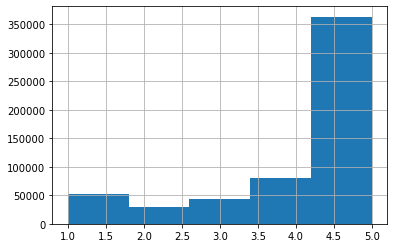

In [8]:
reviews.Score.hist(bins=5, grid=True)

# So our data is skewed, meaning there are more 4-5 reviews than of 1-3
# We need to somehow normalize it

In [9]:
print(reviews.groupby('Score').count().Id)

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


# Normalizing Data

In [10]:
# We take random entries of the minimum no of data from all the scores
# Basically we take 29743 random entries out of 52264 entries for score = 1
# And so on...

s1 = reviews[reviews['Score'] == 1].sample(n=29743)
s2 = reviews[reviews['Score'] == 2].sample(n=29743)
s3 = reviews[reviews['Score'] == 3].sample(n=29743)
s4 = reviews[reviews['Score'] == 4].sample(n=29743)
s5 = reviews[reviews['Score'] == 5].sample(n=29743)

In [11]:
# We create a new "normalized" dataset for the same

reviews_norm = pd.concat([s1, s2, s3, s4, s5],axis=0)
reviews_norm.reset_index(drop=True,inplace=True)

In [12]:
print(reviews_norm.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


In [13]:
reviews_norm.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,31183,B007M83302,A37JB1DGWBIDDS,C. Erickson,7,13,1,1266883200,Gross!,I just cannot understand the high praise these...
1,209047,B00004RAMY,A2YA5ORUK9L42T,confused,0,0,1,1292112000,Problem setting,I can't figure out how to load the trap. It c...
2,170212,B002ZOG29C,ABYPKLBM2H3B0,"Timothy J. Egan ""Mountain Chef""",0,1,1,1326758400,Very bitter coffee,This coffee brand is extremely bitter and very...
3,28002,B0002AQ5SY,A2I3PNA22H1V2W,Ricky,0,0,1,1322265600,These treats not fit for a DOG,We threw this garbage straight in to the trash...
4,516734,B001QX2IH8,AW41Q5K4R499D,mom of 2,0,2,1,1344643200,Gerber's fruits are cooked,"I've been giving my daughter Gerber fruits, ve..."


In [14]:
reviews_norm.size

1487150

# String Concatenation

In [15]:
# Convert the review into a string with continuous characters

reviews_string = reviews_norm.Summary.str.cat()

# Word Cloud Generation

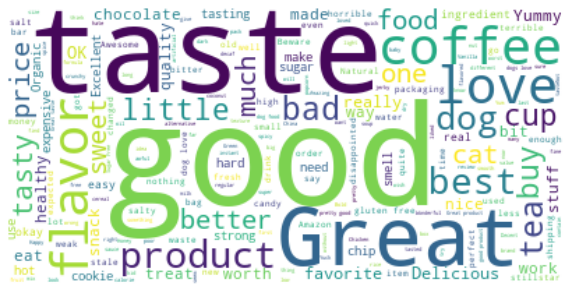

In [16]:
# Generate a word cloud for the entire (1-5) score

wordcloud = WordCloud(background_color='white').generate(reviews_string)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
# Separate data for positive and negative reviews

negative_reviews = reviews_norm[reviews_norm['Score'].isin([1,2]) ]
positive_reviews = reviews_norm[reviews_norm['Score'].isin([4,5]) ]

In [18]:
# Convert the review into a continuous character string

negative_reviews_string = negative_reviews.Summary.str.cat()
positive_reviews_string = positive_reviews.Summary.str.cat()

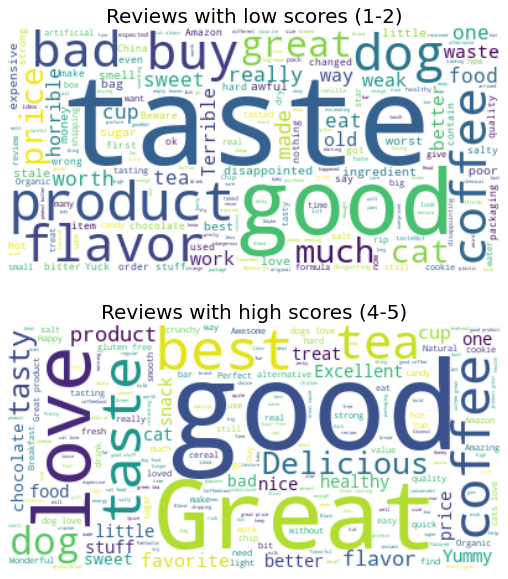

In [19]:
# Generate a word cloud for low and high scores

wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_string)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_string)

fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with low scores (1-2)',fontsize=20)

ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with high scores (4-5)',fontsize=20)

plt.show()

# Bag of Word Methodology
### A much better approach than word cloud

In [20]:
# We have kept use_idf as false, so we are essentially using the bag of word methodology

negative_vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(3, 3), max_df=1.0, min_df=1, max_features=2000,use_idf=False)
negative_vectorized = negative_vectorizer.fit_transform(negative_reviews.Summary)

positive_vectorizer = TfidfVectorizer(stop_words=None, ngram_range=(3, 3), max_df=1.0, min_df=1, max_features=2000,use_idf=False)
positive_vectorized = positive_vectorizer.fit_transform(positive_reviews.Summary)

print(negative_vectorized.shape)
print(positive_vectorized.shape)

(59486, 2000)
(59486, 2000)


# Displaying the most meaningful N-grams

In [21]:
negative_vocab = negative_vectorizer.get_feature_names()
negative_vectorized_df = pd.DataFrame(negative_vectorized.todense(),columns=[negative_vocab]).sum()
negative_vectorized_df.sort_values(ascending=False).head(30)

made in china        308.257393
do not buy           239.289776
not what expected    231.681798
not the best         197.957084
not so good          190.396977
not for me           181.796836
not the same         169.305276
not very good        166.247362
not worth the        162.575878
as good as           159.722482
not as good          153.753040
not worth it         134.861443
waste of money       126.031041
this is not          124.953500
not so great         110.527098
don waste your       109.919098
not my favorite      108.656490
waste your money     103.930174
not that great       101.690234
if you like           98.561427
used to be            85.313210
did not like          76.100070
worth the money       74.953319
not gluten free       74.698671
not so much           73.424621
save your money       70.828427
didn like it          66.702249
don buy this          64.851032
not as advertised     64.560478
my cup of             63.943147
dtype: float64

In [22]:
positive_vocab = positive_vectorizer.get_feature_names()
positive_vectorized_df = pd.DataFrame(positive_vectorized.todense(),columns=[positive_vocab]).sum()
positive_vectorized_df.sort_values(ascending=False).head(30)

my dog loves            144.556123
good but not            115.939805
cup of coffee           113.234319
love this stuff         101.170844
one of the               95.218331
my dogs love             93.969415
if you like              93.039065
as good as               90.064404
for the price            88.300154
is the best              86.828931
on the go                81.234520
hard to find             80.355160
of the best              75.673558
dog loves these          72.996746
cats love it             70.524758
love this tea            70.081610
dogs love them           68.549338
one of my                68.232925
good for you             67.232002
dog loves them           66.930171
dogs love it             65.764818
on the market            60.733095
better than expected     60.242276
love this coffee         58.243760
my cats love             57.308122
great product but        54.623110
dog loves it             53.302933
not the best             52.323691
this is the         